### 信息熵：随机变量不确定度的度量
### 熵越大，不确定越高，熵越小，不确定越低
### H = -Σ(pi*log(pi))   二维：-p * log(p) - (1-p) * log(1-p)

In [1]:
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

In [2]:
x = np.linspace(0.01, 0.99, 200)

In [3]:
def entropy(x):
    return -x * np.log(x) - (1-x) * np.log(1-x)

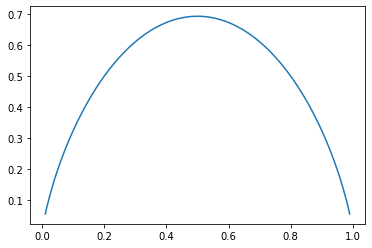

In [4]:
plt.plot(x, entropy(x))

In [5]:
# 决策边界的公共方法
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

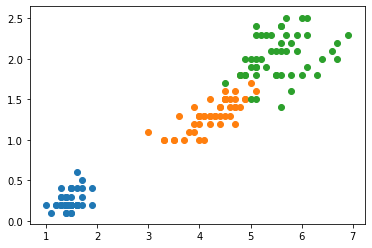

In [6]:
iris = ds.load_iris()
X, y = iris.data, iris.target
X = X[:, 2:]
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [7]:
tree_class = DecisionTreeClassifier(max_depth=2, random_state=42, criterion="entropy")

In [8]:
tree_class.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


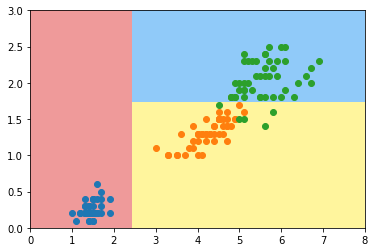

In [9]:
plot_decision_boundary(tree_class, [0, 8, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

### Simulation

In [15]:
def split(X, y, d, v):
    left_index = X[:, d] >= v
    right_index = X[:, d] < v
    return X[left_index], X[right_index], y[left_index], y[right_index]

def entropy(y):
    count = Counter(y)
    res = 0
    for i in count:
        p = count[i] / len(y)
        res = res - p * np.log(p)
    return res

def try_split(X, y):
    best_d, best_v = -1, -1
    best_entropy = 1e9
    
    for i in range(X.shape[1]):
        arg_index = np.argsort(X[:, i])
        for j in range(1, len(X)):
            v = (X[arg_index[j-1], i] + X[arg_index[j], i]) / 2 
            X_r, X_l, y_r, y_l = split(X, y, i, v)
            entropy01 = entropy(y_l) + entropy(y_r)
        
            if(entropy01 < best_entropy):
                best_entropy, best_d, best_v = entropy01, i, v
            
    return best_entropy, best_d, best_v

In [16]:
##一次划分
try_split(X, y)

(0.6931471805599453, 0, 2.45)

In [17]:
X_r, X_l, y_r, y_l = split(X, y, 0, 2.45)

In [18]:
entropy(y_l)

0.0

In [19]:
entropy(y_r)

0.6931471805599453

In [21]:
##二次划分
try_split(X_r, y_r)

(0.4132278899361904, 1, 1.75)